<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/bonn-eeg-ml/notebooks/week03_compare_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Comparing EEG Sets Z, F, and S

loads EEG data from sets Z (healthy), F (interictal), and S (ictal) from the Bonn dataset. We explore their differences by visualizing the EEG signals in both time and frequency domains. This analysis prepares us for classification tasks in later weeks.


### Setup and File Uploads

In [3]:
from google.colab import files
import zipfile
import os

# Upload bonn-eeg-ml.zip
uploaded = files.upload()

# Unzip main folder
with zipfile.ZipFile("bonn-eeg-ml.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Unzip inner zip files
base_path = "bonn-eeg-ml"
for f in os.listdir(base_path):
    if f.endswith(".zip"):
        zip_path = os.path.join(base_path, f)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(os.path.join(base_path, f.replace(".zip", "")))


Saving bonn-eeg-ml.zip to bonn-eeg-ml.zip


###Import Functions

In [4]:
import sys
sys.path.append("bonn-eeg-ml")

from scripts.preprocess import load_eeg_folder
from scripts.extract_features import extract_bandpowers
import matplotlib.pyplot as plt
import numpy as np


###Load EEG Signals (Set Z, Set F, Set S)

In [5]:
z_signals = load_eeg_folder("bonn-eeg-ml/z (2)/z/Z", limit=3)
f_signals = load_eeg_folder("bonn-eeg-ml/f/F", limit=3)
s_signals = load_eeg_folder("bonn-eeg-ml/s/S", limit=3)



Z: 3 files | F: 3 files | S: 3 files


###Plot EEG Time-Domain Signals

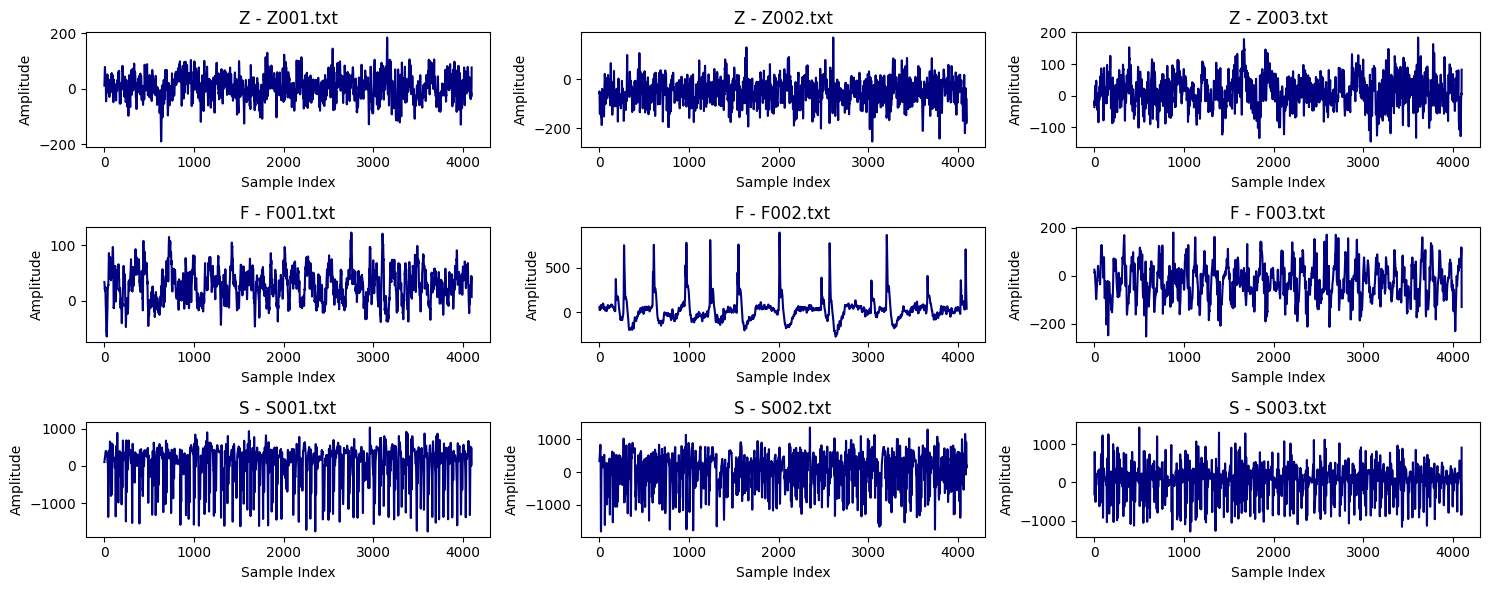

In [6]:
def plot_signals_grid(signals_dict):
    fig, axs = plt.subplots(len(signals_dict), 3, figsize=(15, 6))
    for row_idx, (label, signals) in enumerate(signals_dict.items()):
        for i in range(3):
            axs[row_idx, i].plot(signals[i][1], color='navy')
            axs[row_idx, i].set_title(f"{label} - {signals[i][0]}")
            axs[row_idx, i].set_xlabel("Sample Index")
            axs[row_idx, i].set_ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

plot_signals_grid({"Z": z_signals, "F": f_signals, "S": s_signals})


###Plot EEG Frequency-Domain Signals

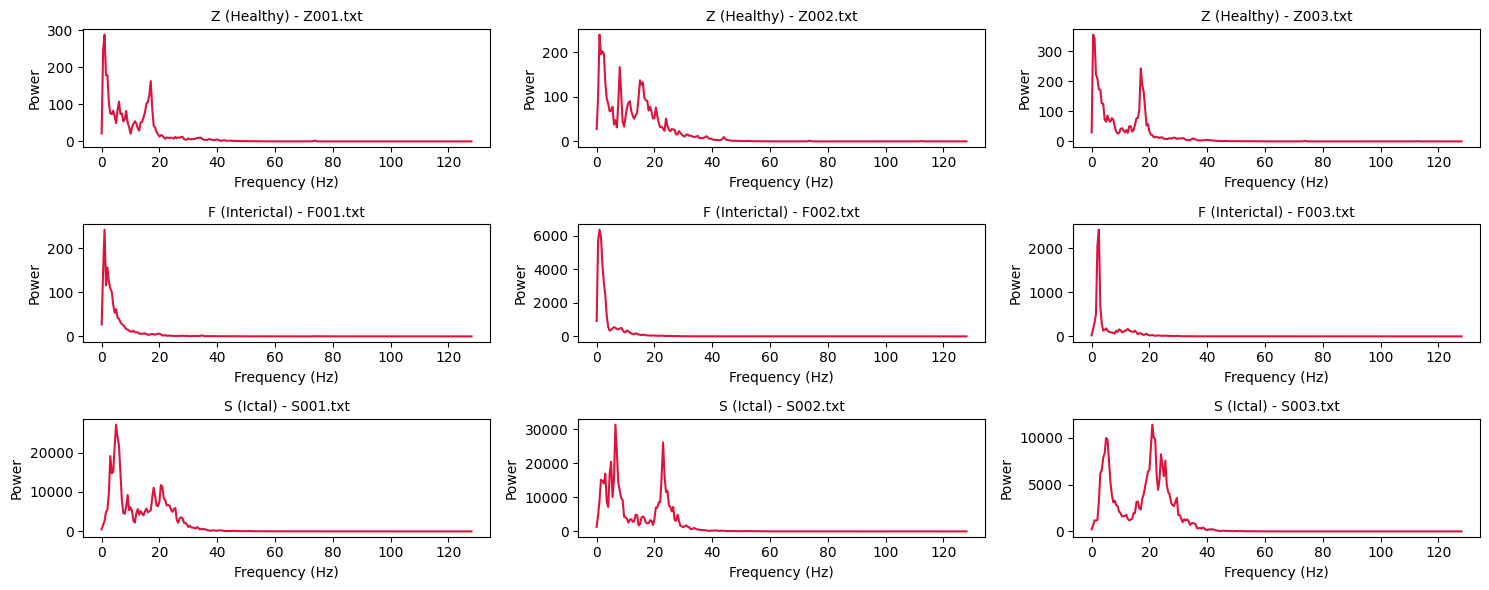

In [23]:
def plot_psd_grid(signals_dict, fs=256):
    fig, axs = plt.subplots(len(signals_dict), 3, figsize=(15, 6))

    for row_idx, (label, signals) in enumerate(signals_dict.items()):
        for i in range(3):
            freqs, psd = compute_psd(signals[i][1], fs)
            axs[row_idx, i].plot(freqs, psd, color='crimson')
            axs[row_idx, i].set_title(f"{label} - {signals[i][0]}", fontsize=10)
            axs[row_idx, i].set_xlabel("Frequency (Hz)")
            axs[row_idx, i].set_ylabel("Power")

    plt.tight_layout()
    plt.show()

plot_psd_grid({
    "Z (Healthy)": z_signals,
    "F (Interictal)": f_signals,
    "S (Ictal)": s_signals
})



###EEG Bandpower Comparison Across Z, F, and S Sets

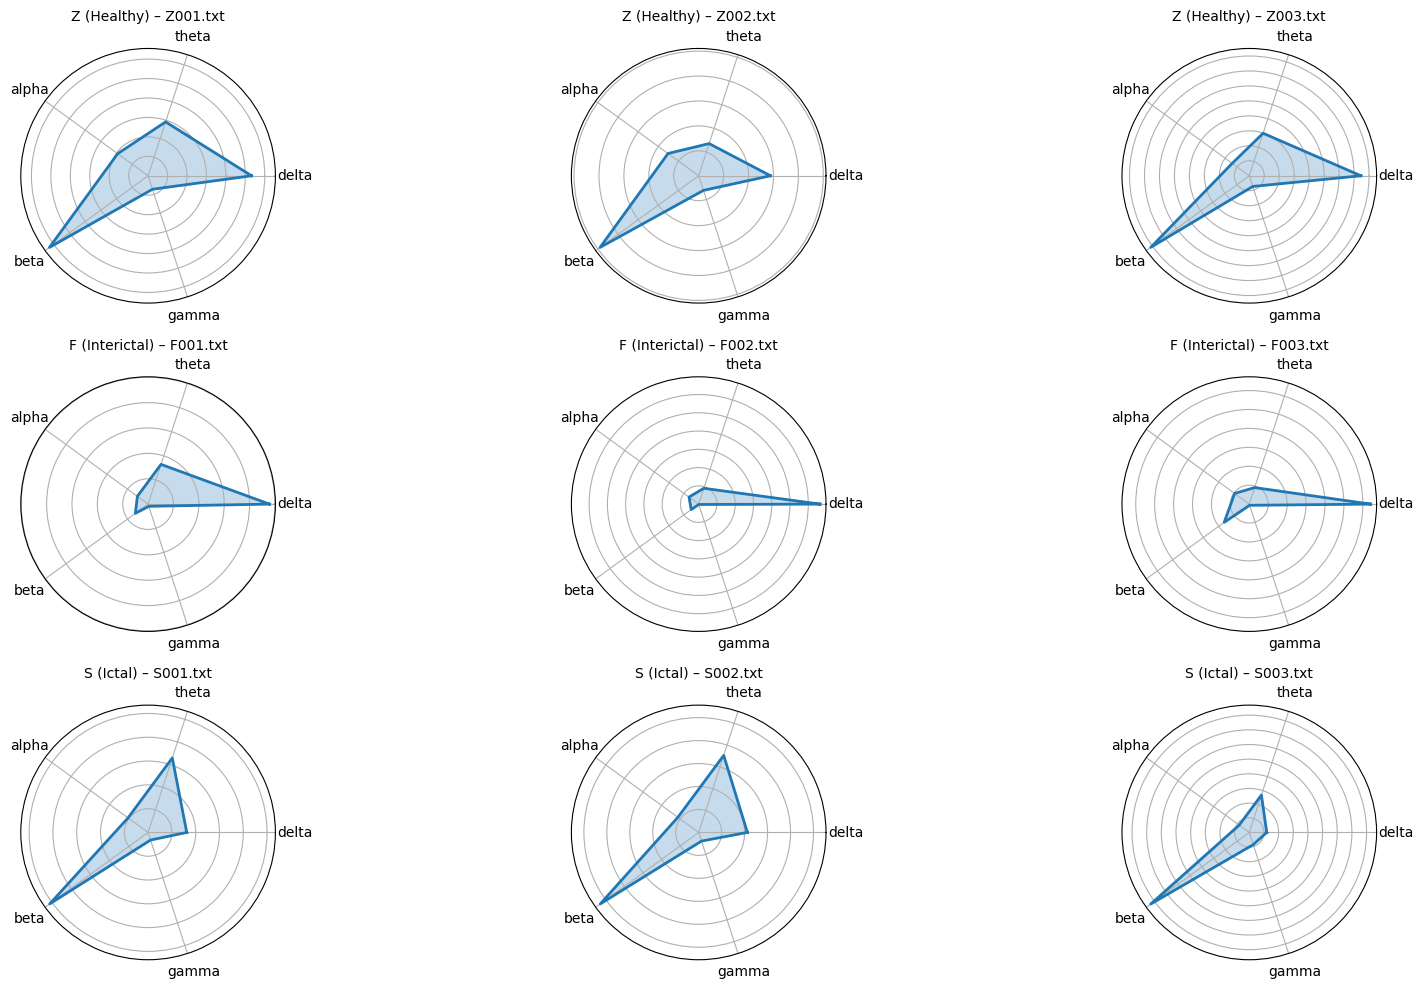

In [25]:
import matplotlib.pyplot as plt
from math import pi

def plot_bandpower_radar_grid(signals_dict):
    bands = list(extract_bandpowers(signals_dict[list(signals_dict.keys())[0]][0][1]).keys())
    angles = [n / float(len(bands)) * 2 * pi for n in range(len(bands))] + [0]

    fig, axs = plt.subplots(len(signals_dict), 3, figsize=(18, 10), subplot_kw=dict(polar=True))

    for row_idx, (label, signals) in enumerate(signals_dict.items()):
        for i in range(3):
            signal = signals[i][1]
            bp = extract_bandpowers(signal)
            values = list(bp.values()) + [list(bp.values())[0]]
            ax = axs[row_idx, i]

            ax.plot(angles, values, linewidth=2, label=label)
            ax.fill(angles, values, alpha=0.25)
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(bands)
            ax.set_yticklabels([])
            ax.set_title(f"{label} – {signals[i][0]}", fontsize=10, pad=20)

    plt.tight_layout()
    plt.show()

plot_bandpower_radar_grid({
    "Z (Healthy)": z_signals,
    "F (Interictal)": f_signals,
    "S (Ictal)": s_signals
})

